In [1]:
#Firstly, I import all the libraries what I need
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# and after that, I create a function for this function my aim is to merge to fgImg and bgImg and fgImg should be in front of the BgImg.
def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):
    fgH, fgW = fgImg.shape[:2]
    bgH, bgW = bgImg.shape[:2]
    """In the above, my aim is to get the dimensions of the FgImg and BgImg """
    fgTop, fgLeft = topLeft
    """In the above,my aim is to get the location of the foreground image's top-left corner in the background image."""
    final = bgImg.copy()
    # create for-loop look all pixels in the foreground image and check the pixels if it belongs the fgMask determine the location in the background .
    for y in range(fgH):
        for x in range(fgW):
            if fgMask[y,x] > 0:
                backgroundX = fgLeft + x
                backgroundY = fgTop + y
                # check the foreground pixels is in the boundries of background image
                if backgroundX >= 0 and backgroundY >= 0 and backgroundX < bgW  and backgroundY < bgH:
                    # Copy the foreground image to the background image
                    final[backgroundY,backgroundX] = fgImg[y,x]

    return final

In [3]:
#the code reads dog, masked_dog and sazova_park image
fgImg = cv2.imread("dog.jpg")
fgMask = cv2.imread("masked_dog.png", cv2.IMREAD_GRAYSCALE)
bgImg = cv2.imread("sazova_park.png")

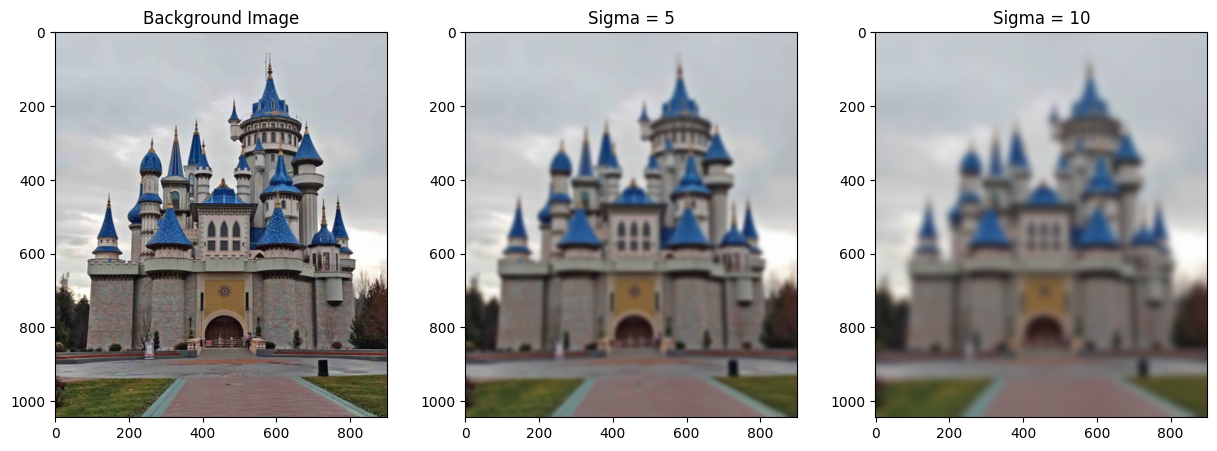

In [4]:
# this function uses gaussianKernel for smoothing the image firstly determine the images size according to gaussian filter
def gaussianSmoothing(img, sigma):
    ksize = int(6*sigma) + 1
    kernel = cv2.getGaussianKernel(ksize, sigma)
    smoothedImg = cv2.sepFilter2D(img, -1, kernel, kernel)
    return smoothedImg
# according to question I choose the value 5 and 10
sigmasforbackground=[5,10]
fig, axs = plt.subplots(1, len(sigmasforbackground)+1, figsize=(15, 5))
# show the background
axs[0].imshow(cv2.cvtColor(bgImg, cv2.COLOR_BGR2RGB))
axs[0].set_title("Background Image")
# create a for-loop through each sigma value
for i, sigma in enumerate(sigmasforbackground):
    # With the current sigma value, blur the background image.
    smoothedImg = gaussianSmoothing(bgImg, sigma)
    # show the all image in one line
    axs[i+1].imshow(cv2.cvtColor(smoothedImg,cv2.COLOR_BGR2RGB))
    axs[i+1].set_title(f"Sigma = {sigma}")
plt.show()

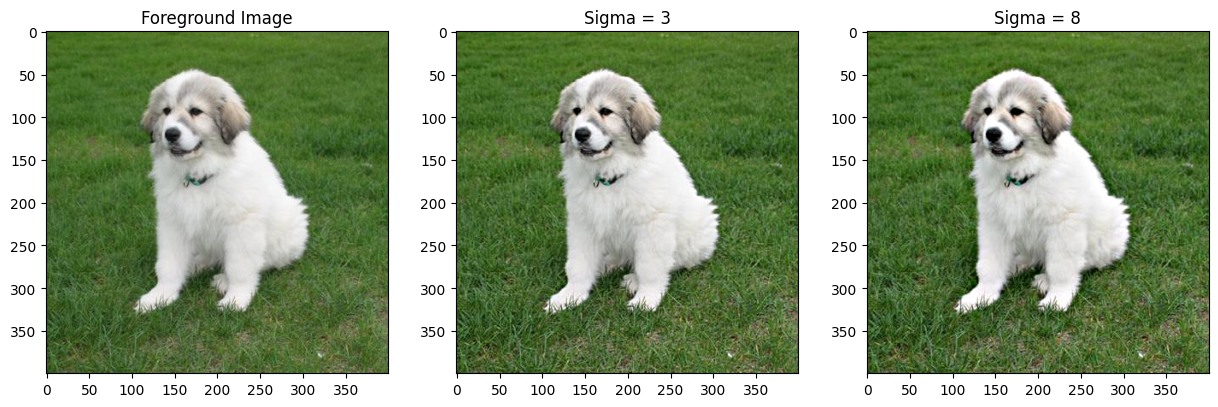

In [5]:
def unsharpMasking(img, sigma):
    blurredImg = gaussianSmoothing(img, sigma)
    unsharpImg = cv2.addWeighted(img, 1.5, blurredImg, -0.5, 0)
    return unsharpImg      
sigmasforforeground=[3,8]
fig, axs = plt.subplots(1, len(sigmasforforeground)+1, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(fgImg, cv2.COLOR_BGR2RGB))
axs[0].set_title("Foreground Image")
for i, sigma in enumerate(sigmasforforeground):
    smoothedImg = unsharpMasking(fgImg, sigma)
    axs[i+1].imshow(cv2.cvtColor(smoothedImg,cv2.COLOR_BGR2RGB))
    axs[i+1].set_title(f"Sigma = {sigma}")
plt.show()

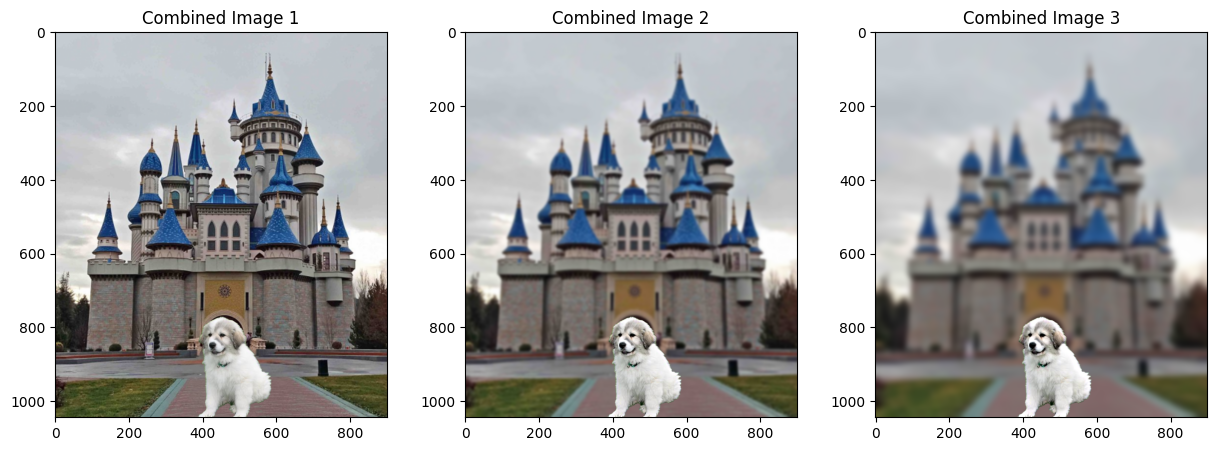

In [6]:
# In this function , my aim is the combine sharpened Foreground and Smoothed Background and print the final results.
def combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, bgSigma, fgSigma, topLeft):
    smoothedBgImg = gaussianSmoothing(bgImg, bgSigma)
    sharpenedFgImg = unsharpMasking(fgImg, fgSigma)
    combinedImg = combineForegroundBackground(sharpenedFgImg, fgMask, smoothedBgImg, topLeft)

    return combinedImg
combinedImg = combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, 0, 0, ((728, 279)))
combinedImg2 = combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, 3, 5, ((728, 279)))
combinedImg3 = combineSharpenedForegroundSmoothedBackground(fgImg, fgMask, bgImg, 8, 10, ((728, 279)))
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,5)

axs[0].imshow(combinedImg[:,:,::-1])
axs[0].set_title("Combined Image 1")
axs[1].imshow(combinedImg2[:,:,::-1])
axs[1].set_title("Combined Image 2")
axs[2].imshow(combinedImg3[:,:,::-1])
axs[2].set_title("Combined Image 3")

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()